# Método de Runge Kutta para solución de ecuaciones diferenciales

El método de Runge-Kutta de segundo orden, a menudo denominado método RK, es una técnica numérica utilizada para resolver ecuaciones diferenciales ordinarias (EDOs). Es una mejora respecto al método de Euler, ofreciendo mayor precisión. En general, los métodos de Runge-Kutta son muy populares debido a su balance entre precisión y eficiencia computacional, pero todos tienen la forma generalizada de la ecuación:

$$
y_{i+1} = y_i + ϕ(x_i,y_i,h)h
$$

Donde $ϕ(x_i,y_i,h)$ se conoce como __funcion incremento__, la cual puede interpretarse como una pendiente representativa en el intervalo. La función incremento se escribe de la forma general como:

$$
ϕ = a_1k_1 + a_2k_2 + a_3k_3 + ... + a_nk_n
$$

Donde a son constantes y las $k$ son:

$$
k_1 = f(x_i,y_i)
$$
$$
k_2 = f(x_i + p_1h,y_i +q_{11}k_1h)
$$
$$
k_3 = f(x_i + p_2h,y_i +q_{21}k_1h + q_{22}k_2h)
$$




Donde las $p$ y las $q$ son constantes. Observe que las $k$ son relaciones de recurrencia. Es decir, $k_1$ aparece en la ecuación $k_2$, la cual aparece en la ecuación $k_3$, etcétera. Como cada k es una evaluación funcional, esta recurrencia vuelve eficientes a los métodos RK para cálculos en computadora.

Es posible tener varios tipos de métodos de Runge-Kutta empleando diferentes números de términos en la función incremento especificada por n. Observe que el método de Runge-Kutta (RK) de primer orden con n = 1 es, de hecho, el método de Euler.

## El método de runge kutta de orden 2
 La versión de segundo orden del método es

$$
y_{i+1} = y_i + (a_1k_1 + a_2k_2)h
$$

donde:

$$
k_1 = f(x_i,y_i)
$$

$$
k_2 = f(x_i+p_1h, y_i + q_{11}k_1h)
$$


En este punto por igualación y semenjanza con la relación de series de taylor podemos decir que:

$$
a_1 = 1 - a_2
$$

$$
p_1 = q_{11} = \frac{1}{2a_2}
$$


Debido a que podemos elegir un número infinito de valores para a2, hay un número
infinito de métodos RK de segundo orden. Cada versión daría exactamente los mismos resultados si la solución de la EDO fuera cuadrática, lineal o una constante. Sin embargo, se obtienen diferentes resultados cuando (como típicamente es el caso) la solución es más complicada.

### Método de Heun con un solo corrector ($a_2 = 1/2)$

La fórmula para calcular el siguiente queda:

$$
y_{i+1} = y_i + (\frac{1}{2}k_1 + \frac{1}{2}k_2)h
$$

Donde:

$$
k_1 = f(x_i,y_i)
$$
$$
k_2 = f(x_i+h, y_i +k_1h)
$$

## Retomando el ejercicio del circuito RLC



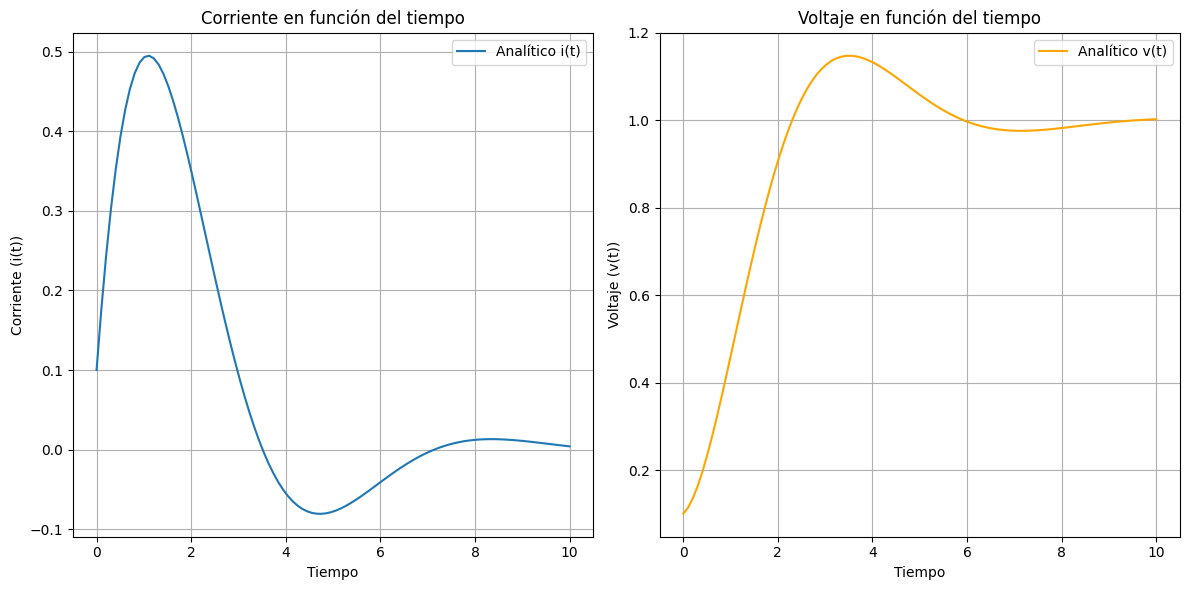

In [5]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

init_printing(use_latex=True)


t, vi, L, R, C = symbols("t vi L R C")
C1,C2 = symbols("C1 C2")
v = Function("v")(t)
i = Function("i")(t)

didt=i.diff(t)
dvdt=v.diff(t)
expr1 = Eq(didt, (1/L)*vi-(R/L)*i-(1/L)*v)

expr1=expr1.subs(L, 1).subs(R,1).subs(C,1).subs(vi,1)
expr2 = Eq(dvdt, (1/C)*i)
expr2=expr2.subs(L,1).subs(R,1).subs(C,1).subs(vi,1)
s=dsolve([expr1,expr2])
eq1 = Eq(s[0].rhs.subs({t:0}).evalf(), 0.1)
eq2 = Eq(s[1].rhs.subs({t:0}).evalf(), 0.1)
sol = solve([eq1,eq2], [C1,C2])
e1 = lambdify(t,s[0].rhs.subs(sol),'numpy')
e2 = lambdify(t,s[1].rhs.subs(sol),'numpy')
t_vals = np.linspace(0,10,100)

# Graficando soluciones analíticas y aproximadas
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t_vals, e1(t_vals), label='Analítico i(t)')
plt.xlabel('Tiempo')
plt.ylabel('Corriente (i(t))')
plt.title('Corriente en función del tiempo')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t_vals, e2(t_vals), label='Analítico v(t)', color='orange')
plt.xlabel('Tiempo')
plt.ylabel('Voltaje (v(t))')
plt.title('Voltaje en función del tiempo')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

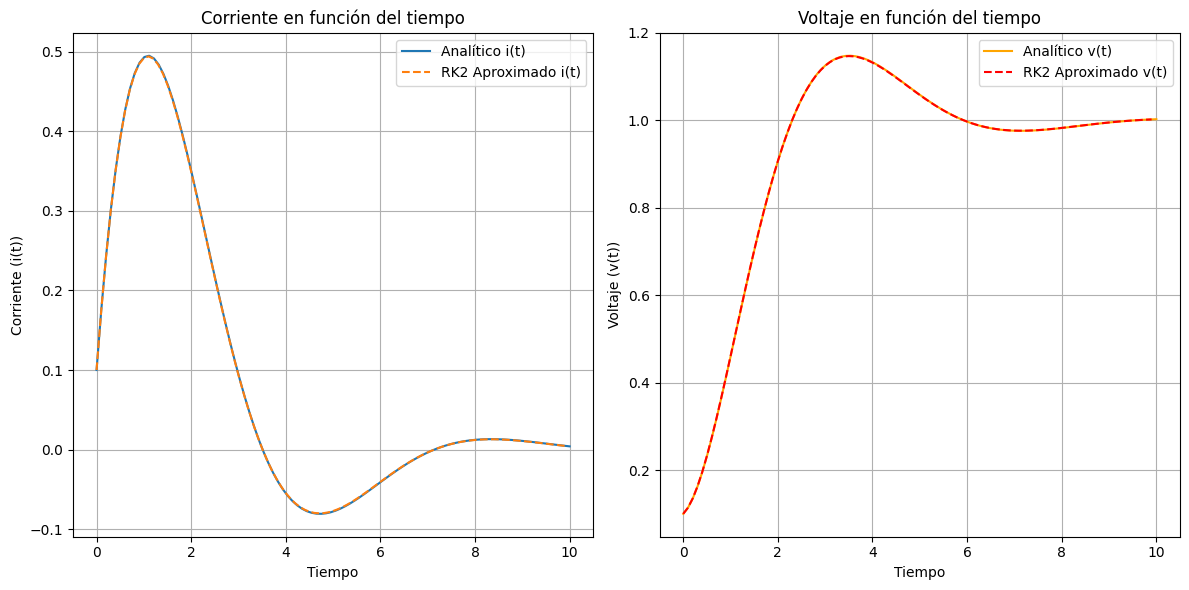

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de las funciones para el sistema de ecuaciones diferenciales
def func_i(v, i, t):
    return 1 - i - v

def func_v(i, v, t):
    return i

def runge_kutta_2_system(funcs, y0, t_range, dt):
    """
    Método de Runge-Kutta de orden 2 para un sistema de ecuaciones diferenciales.

    :param funcs: Lista de funciones que representan el sistema de ecuaciones diferenciales.
    :param y0: Condiciones iniciales para cada variable en el sistema.
    :param t_range: Rango de tiempo como una tupla (inicio, fin).
    :param dt: Paso de tiempo.
    :return: Tupla de listas (tiempos, valores de cada variable).
    """
    t_values = np.arange(t_range[0], t_range[1], dt)
    y_values = [np.array(y0)]

    for t in t_values[:-1]:
        y_current = y_values[-1]

        k1 = np.array([f(*y_current, t) for f in funcs])
        k2 = np.array([f(*(y_current + k1 * dt), t + dt) for f in funcs])

        y_next = y_current + dt * (0.5 * k1 + 0.5 * k2)
        y_values.append(y_next)

    return t_values, np.array(y_values).T



# Paso de tiempo para el método RK2
dt = 0.1

# Condiciones iniciales y rango de tiempo
initial_i = 0.1
initial_v = 0.1
time_range = (0, 10)

# Condiciones iniciales para i y v
initial_conditions = [initial_i, initial_v]


# Solución aproximada para i(t) y v(t) usando el Método de Runge-Kutta de orden 2
t_values_rk2, [i_values_rk2_system, v_values_rk2_system] = runge_kutta_2_system(
    [func_i, func_v], initial_conditions, time_range, dt
)

# Graficando soluciones analíticas y aproximadas
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t_vals, e1(t_vals), label='Analítico i(t)')
plt.plot(t_values_rk2, i_values_rk2_system, label='RK2 Aproximado i(t)', linestyle='--')
plt.xlabel('Tiempo')
plt.ylabel('Corriente (i(t))')
plt.title('Corriente en función del tiempo')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t_vals, e2(t_vals), label='Analítico v(t)', color='orange')
plt.plot(t_values_rk2, v_values_rk2_system, label='RK2 Aproximado v(t)', linestyle='--', color='red')
plt.xlabel('Tiempo')
plt.ylabel('Voltaje (v(t))')
plt.title('Voltaje en función del tiempo')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


## Tarea
A.

1. Implementar el método de runge kutta de orden 3.
2. Implementar el método de runge kutta de orden 4.

Los métodos deben ser implementados para resolver cualquier sistema de ecuaciones diferenciales.

In [ ]:
## TU CODIGO VA ACÁ

## HASTA ACÁ

B.
Investigar sobre el modelo depredador-presa de Lotka-Volterra. Solucionar el sistema y graficar su solución de forma analítica y usando el método de runge kutta de orden 2 para solucionarlo.


In [7]:
## TU CODIGO VA ACÁ

## HASTA ACÁ